In [1]:
from graded_asignments.graded_2.DTForest import DTForest
from utils import *
import pandas as pd

In [2]:
pd_2021 = pd.read_csv('data/data_2021.csv')
pd_2022 = pd.read_csv('data/data_2022.csv')
np_2021 = pd_2021['Demand'].to_numpy()
np_2022 = pd_2022['Demand'].to_numpy()

#### 3a)
*Based on the tree you implemented in (2), create an ensemble of regression trees. Decide on
the number of trees, you can for example start with 50-100 trees. Each tree should be
initialized with random parameters.*

In [3]:
forest_size = 200
window_size = 10
dt_forest = DTForest(forest_size)

#### 3b)
*Implement bootstrapping, and train each of your trees on a random part of the dataset*

In [4]:
test_data, train_data = split([pd_2021, pd_2022])

In [5]:
dt_forest.train(train_data, window_size)

training...........................................................................................................................................................................................................Finished!

#### 3c)
Implement aggregation to combine the output of all your trees to a single value

In [6]:
# Aggregation implemented in predict method
dt_forest.predict.__doc__

'\n        :param x: input as list\n        :return: prediction using aggregation and bagging\n        '

#### 3d)
*Using the same sliding window approach as in (2.a), start from 01.01.2021 and use the
ensemble to predict the next value. Save each prediction in a list. Use matplotlib to plot the
results alongside the original data and your predictions from (2.c)*

In [7]:
window = np_2021[-window_size:].tolist()  # last window of given data windoww
#n_predictions = 365-window_size
#dt_prediction = dt_forest.predict2(window, 365-window_size)
x, y = slide(np_2021, window_size)
dt_prediction = [None for i in range(window_size)]
pred = dt_forest.predict(x)
dt_prediction = dt_prediction + pred


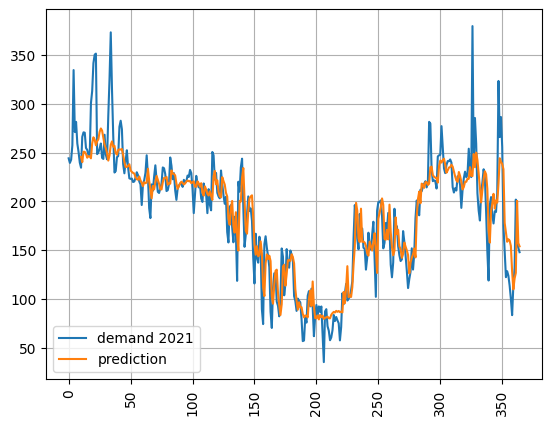

In [8]:
plot_comparison(pd_2021, dt_prediction)